In [1]:
library(ggplot2)
library(dplyr)

plots_dir <- "/work/project/ladcol_013/bt-atac/notebooks/1_processing/test/ArchR_HSC_Only/Plots"


Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
go_mb_all <- read.csv(file.path(plots_dir, "GO_MobilizedBlood_ALL.csv"))
go_bm_all <- read.csv(file.path(plots_dir, "GO_BoneMarrow_ALL.csv"))

cat("Mobilized Blood:", nrow(go_mb_all), "terms\n")
cat("Bone Marrow:", nrow(go_bm_all), "terms\n")

Mobilized Blood: 41 terms
Bone Marrow: 1 terms


In [3]:
cat("=== MOBILIZED BLOOD ===\n")
print(table(go_mb_all$source))

cat("\n=== BONE MARROW ===\n")
print(table(go_bm_all$source))

=== MOBILIZED BLOOD ===

GO:BP GO:MF  KEGG 
   23    15     3 

=== BONE MARROW ===

REAC 
   1 


In [13]:
show_top <- function(df, src = "GO:BP", n = 30) {
  df %>%
    filter(source == src) %>%
    arrange(p_value) %>%
    head(n) %>%
    select(term_name, p_value, intersection_size, term_size)
}

cat("=== TOP 15 BP — MOBILIZED BLOOD ===\n")
print(show_top(go_mb_all, "GO:BP", 30))

cat("\n=== TOP 15 BP — BONE MARROW ===\n")
print(show_top(go_bm_all, "GO:BP", 30))

=== TOP 15 BP — MOBILIZED BLOOD ===
                                                            term_name
1                                  transcription by RNA polymerase II
2                    regulation of transcription by RNA polymerase II
3                              regulation of RNA biosynthetic process
4                                         DNA-templated transcription
5                                   nucleic acid biosynthetic process
6                           regulation of DNA-templated transcription
7                                            RNA biosynthetic process
8                 nucleobase-containing compound biosynthetic process
9                                 regulation of RNA metabolic process
10                                              RNA metabolic process
11                                      regulation of gene expression
12     regulation of nucleobase-containing compound metabolic process
13                   regulation of macromolecule biosy

In [14]:
show_top <- function(df, src = "GO:MF", n = 30) {
  df %>%
    filter(source == src) %>%
    arrange(p_value) %>%
    head(n) %>%
    select(term_name, p_value, intersection_size, term_size)
}

cat("=== TOP 15 BP — MOBILIZED BLOOD ===\n")
print(show_top(go_mb_all, "GO:MF", 30))

cat("\n=== TOP 15 BP — BONE MARROW ===\n")
print(show_top(go_bm_all, "GO:MF", 30))

=== TOP 15 BP — MOBILIZED BLOOD ===
                                                                         term_name
1                                        DNA-binding transcription factor activity
2  RNA polymerase II transcription regulatory region sequence-specific DNA binding
3                                      transcription cis-regulatory region binding
4                             transcription regulatory region nucleic acid binding
5                                    sequence-specific double-stranded DNA binding
6                                                    sequence-specific DNA binding
7            DNA-binding transcription factor activity, RNA polymerase II-specific
8                                                      double-stranded DNA binding
9                                                                      DNA binding
10                                                transcription regulator activity
11           RNA polymerase II cis-regulatory regio

In [6]:
library(ggplot2)
library(dplyr)

go_dotplot <- function(df, src = "GO:BP", n = 15, title = "GO Enrichment") {
  
  plot_data <- df %>%
    filter(source == src) %>%
    arrange(p_value) %>%
    head(n) %>%
    mutate(
      neg_log_p = -log10(p_value),
      gene_ratio = intersection_size / term_size,
      term_short = substr(term_name, 1, 45)
    ) %>%
    arrange(gene_ratio) %>%
    mutate(term_short = factor(term_short, levels = term_short))
  
  ggplot(plot_data, aes(x = gene_ratio, y = term_short)) +
    geom_point(aes(size = intersection_size, color = neg_log_p)) +
    scale_color_viridis_c(option = "plasma", name = "-log10(p)") +
    scale_size_continuous(name = "Genes", range = c(3, 10)) +
    
    # 10% padding on sides
    scale_x_continuous(expand = expansion(mult = c(0.1, 0.1))) + 
    
    labs(x = "Gene Ratio", y = NULL, title = title) +
    theme_minimal(base_size = 13) +
    theme(
      axis.text.y = element_text(size = 16),
      axis.text.x = element_text(size = 13),
        axis.title.x = element_text(size = 18),
        axis.title.y = element_text(size = 18),
      legend.position = "right",
      panel.grid = element_blank(),
      
      axis.line = element_line(color = "black"),
      axis.ticks = element_line(color = "black"),
      axis.ticks.length = unit(0.15, "cm")
    )
}

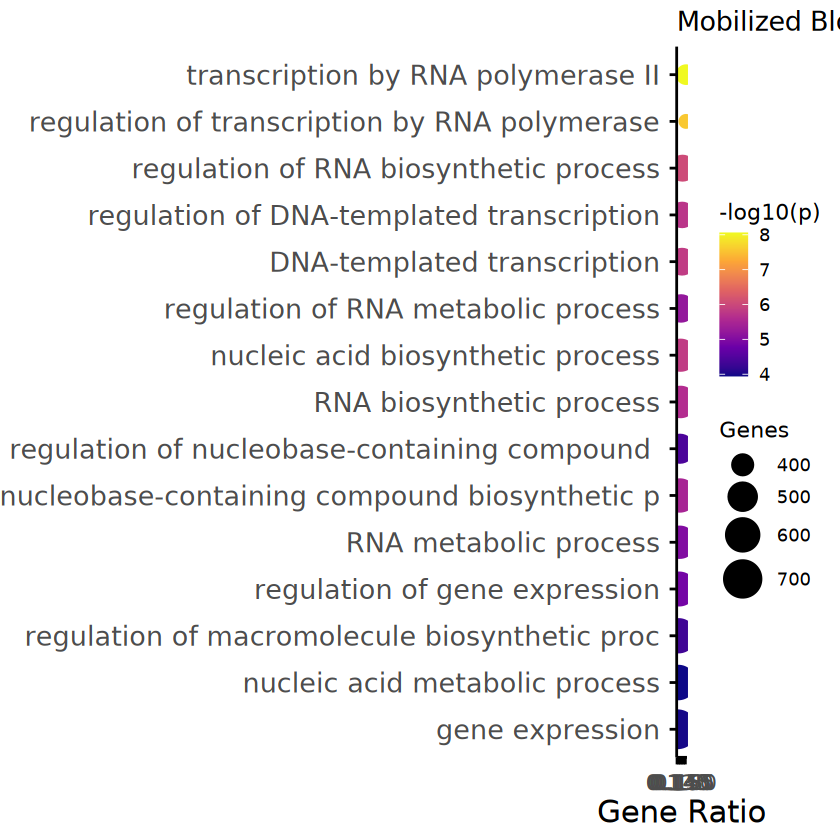

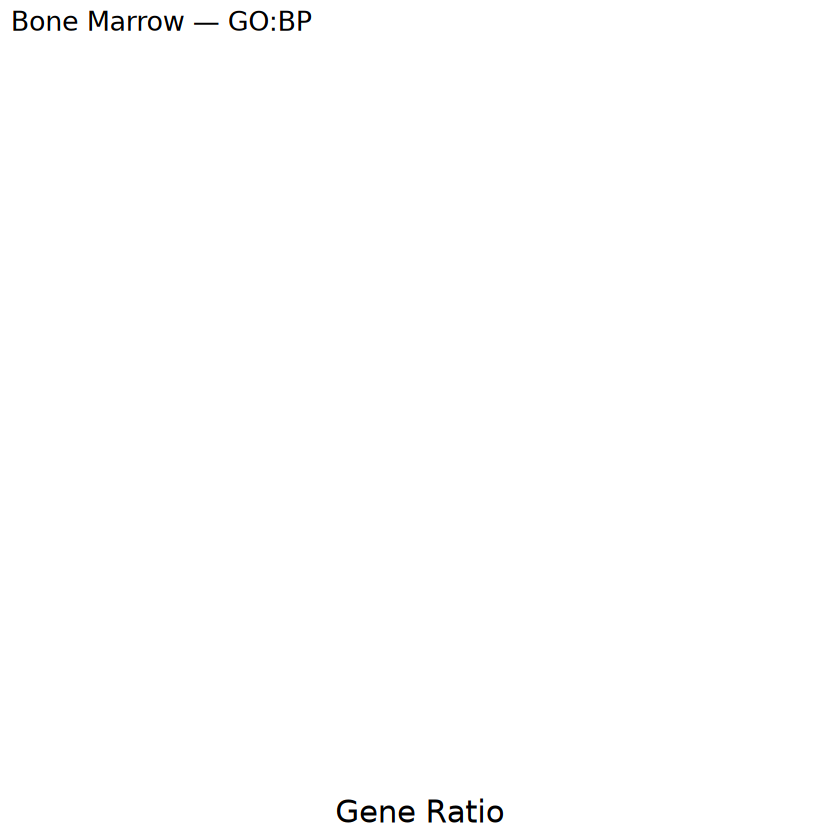

In [7]:
p1 <- go_dotplot(go_mb_all, "GO:BP", 15, "Mobilized Blood — GO:BP")
print(p1)

p2 <- go_dotplot(go_bm_all, "GO:BP", 15, "Bone Marrow — GO:BP")
print(p2)

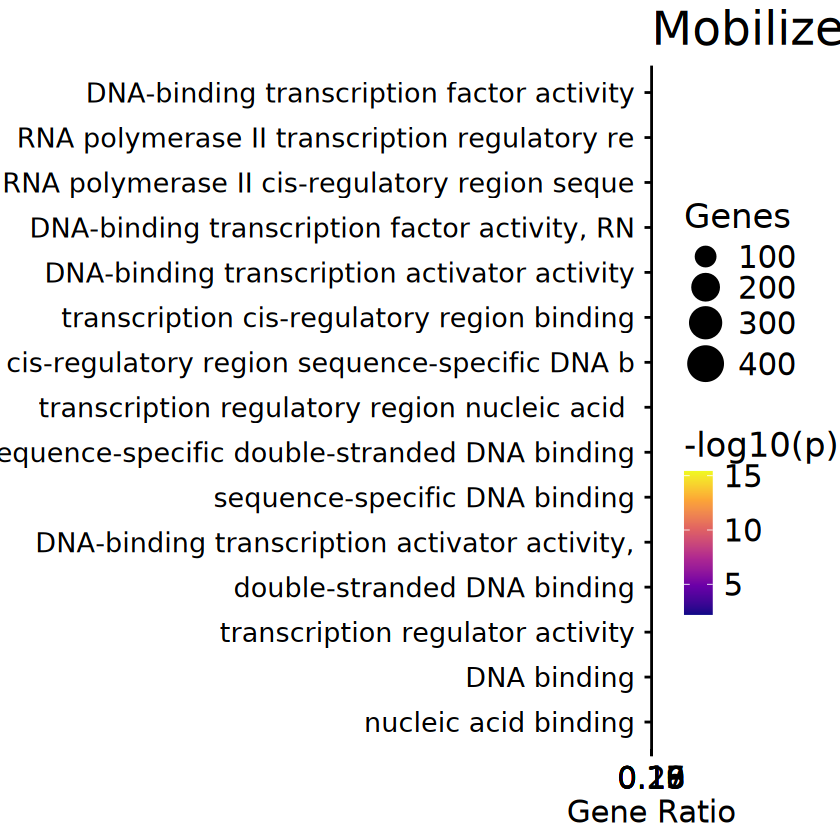

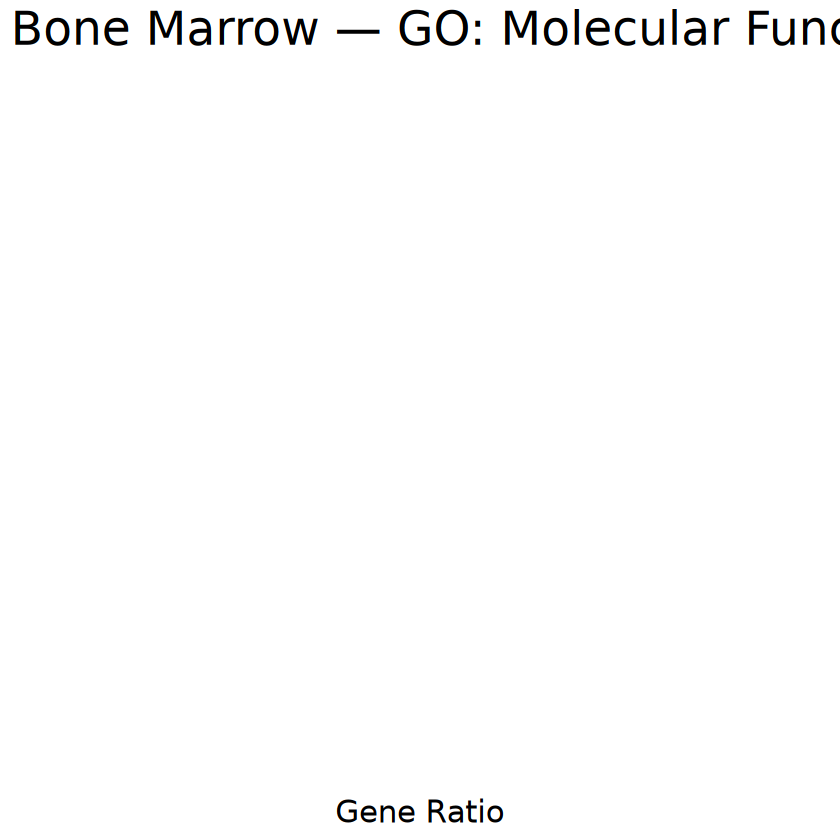

In [16]:
library(svglite)
p1 <- go_dotplot(go_mb_all, "GO:MF", 30, "Mobilized Blood — GO: Molecular Function") +
  theme(
    plot.title = element_text(color = "black", size = 28, face = "bold"),
    plot.subtitle = element_text(color = "black", size = 20),
    axis.title = element_text(color = "black", size = 22, face = "bold"),
    axis.text.x = element_text(color = "black", size = 18),
    axis.text.y = element_text(color = "black", size = 16),
    legend.title = element_text(color = "black", size = 20, face = "bold"),
    legend.text = element_text(color = "black", size = 18)
  )
print(p1)
ggsave(
  filename = file.path(plots_dir, "GO_MobilizedBlood_BP_MF_remade.svg"),
  plot = p1,
  width = 14,
  height = 12,
  units = "in",
  dpi = 300
)

p2 <- go_dotplot(go_bm_all, "GO:MF", 30, "Bone Marrow — GO: Molecular Function") +
  theme(
    plot.title = element_text(color = "black", size = 28, face = "bold"),
    plot.subtitle = element_text(color = "black", size = 20),
    axis.title = element_text(color = "black", size = 22, face = "bold"),
    axis.text.x = element_text(color = "black", size = 18),
    axis.text.y = element_text(color = "black", size = 16),
    legend.title = element_text(color = "black", size = 20, face = "bold"),
    legend.text = element_text(color = "black", size = 18)
  )
print(p2)

In [17]:
show_top <- function(df, src = "GO:MF", n = 30) {
  df %>%
    filter(source == src) %>%
    arrange(p_value) %>%
    head(n) %>%
    mutate(gene_ratio = intersection_size / term_size) %>%
    arrange(gene_ratio) %>%
    select(term_name, p_value, gene_ratio, intersection_size, term_size)
}

cat("=== TOP 30 MF — MOBILIZED BLOOD (sorted by gene ratio) ===\n")
print(show_top(go_mb_all, "GO:MF", 30))

cat("\n=== TOP 30 MF — BONE MARROW (sorted by gene ratio) ===\n")
print(show_top(go_bm_all, "GO:MF", 30))

=== TOP 30 MF — MOBILIZED BLOOD (sorted by gene ratio) ===
                                                                         term_name
1                                                             nucleic acid binding
2                                                                      DNA binding
3                                                 transcription regulator activity
4                                                      double-stranded DNA binding
5         DNA-binding transcription activator activity, RNA polymerase II-specific
6                                                    sequence-specific DNA binding
7                                    sequence-specific double-stranded DNA binding
8                             transcription regulatory region nucleic acid binding
9                              cis-regulatory region sequence-specific DNA binding
10                                     transcription cis-regulatory region binding
11                          